In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/veeralakrishna/DataCamp-Project-Solutions-Python/master/Mobile%20Games%20A/B%20Testing%20with%20Cookie%20Cats/datasets/cookie_cats.csv'
df = pd.read_csv(url); df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


##### Get counts for each version

In [8]:
# collect this

for v in df['version'].unique():    
    print(v, df[df['version']==v]['version'].count())

gate_30 44700
gate_40 45489


In [13]:
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

##### Plot distribution of Gamerounds for first 100 rows of sum_gamerounds

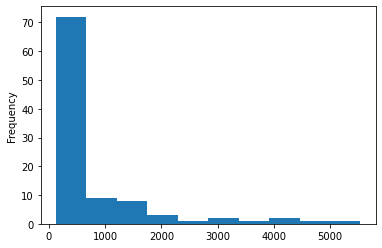

In [18]:
plotDf = df.groupby('sum_gamerounds')['userid'].count()
plotDf.head(n=100).plot(x='sum_gamerounds',y='userid',kind='hist')
plt.show()

#### Proportion of users who stay after 1-day

In [20]:
df['retention_1'].sum()/df['retention_1'].count()

0.4452095044850259

##### Proportion of users who stay after 1 day grouped by version

In [25]:
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

#### Bootstrap to check confidence of gate_30 & gate_40 diffs

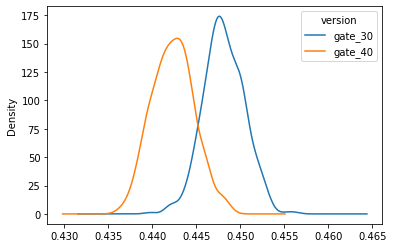

In [33]:
iterations = 500
boot_1d = []
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='kde')
plt.show()

In [34]:
boot_1d.head()

version,gate_30,gate_40
retention_1,0.447485,0.443640
retention_1,0.449199,0.442036
retention_1,0.449518,0.439508
retention_1,0.449878,0.443002
retention_1,0.449476,0.441585


##### Plot of percent difference between gate_30 and gate_40

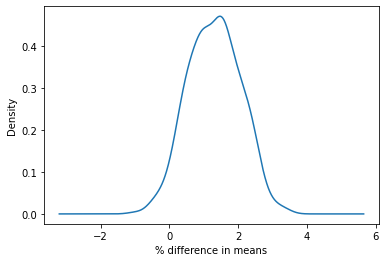

In [39]:
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) /  boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")
plt.show()

##### Probability that a gate at level 30 gives a higher 1 day retention

In [41]:
prob = (boot_1d['diff'] > 0).mean()
print(f'{prob:.1%}')

96.2%


##### 7 day retention percentage

In [42]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

99.9%


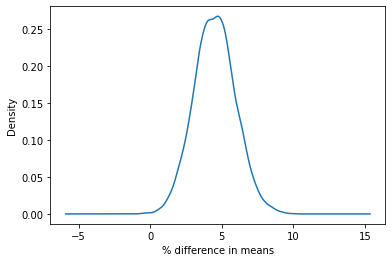

In [45]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(10000):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).mean()
print(f'{prob:.1%}')